In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv('Dataset .csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
# Convert 'Yes' to 1 and 'No' to 0 in 'Has Table booking' and 'Has Online delivery' columns
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [5]:
# Determine the percentage of restaurants that offer table booking and online delivery
table_booking_percentage = (df['Has Table booking'].sum() / len(df)) * 100
online_delivery_percentage = (df['Has Online delivery'].sum() / len(df)) * 100

print(f"Percentage of Restaurants with Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of Restaurants with Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of Restaurants with Table Booking: 12.12%
Percentage of Restaurants with Online Delivery: 25.66%


In [6]:
# Compare the average ratings of restaurants with table booking and those without
avg_rating_with_table_booking = df[df['Has Table booking'] == 1]['Aggregate rating'].mean()
avg_rating_without_table_booking = df[df['Has Table booking'] == 0]['Aggregate rating'].mean()

print(f"Average Rating for Restaurants with Table Booking: {avg_rating_with_table_booking:.2f}")
print(f"Average Rating for Restaurants without Table Booking: {avg_rating_without_table_booking:.2f}")

Average Rating for Restaurants with Table Booking: 3.44
Average Rating for Restaurants without Table Booking: 2.56


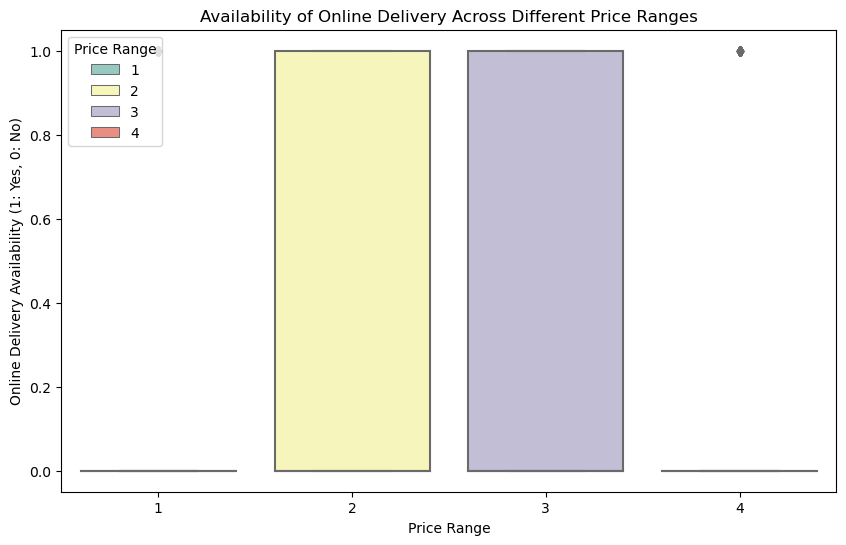

************************************************************************


In [10]:
# Analyze the availability of online delivery among restaurants with different price ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Has Online delivery', data=df, hue='Price range', palette='Set3', dodge=False)
plt.title('Availability of Online Delivery Across Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Online Delivery Availability (1: Yes, 0: No)')
plt.legend(title='Price Range', loc='upper left')
plt.show()

print("************************************************************************")

In [11]:
# Availability of online delivery among restaurants with different price ranges
# Select price ranges
price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()


In [12]:
# Display results
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery          0         1
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791
